<a href="https://colab.research.google.com/github/007tickooayush/data_sc_AB/blob/master/linear_regression_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
# Importing the dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/4. Machine Learning/data/'
dataset = pd.read_csv(data_path+'50_Startups.csv')

In [166]:
len(dataset)

50

In [167]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


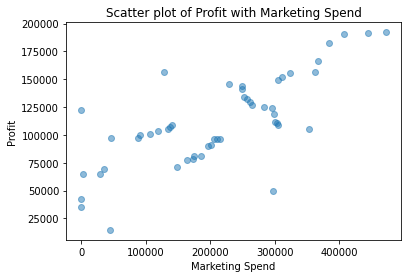

In [168]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

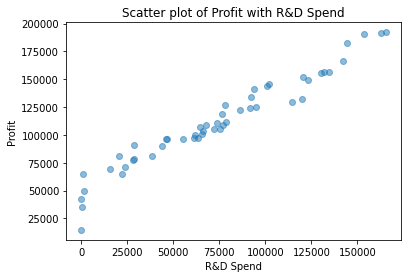

In [169]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

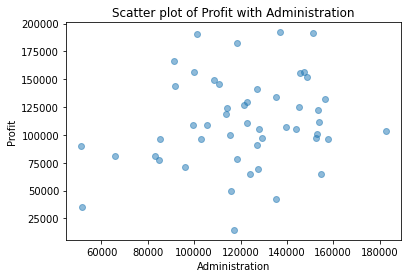

In [170]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

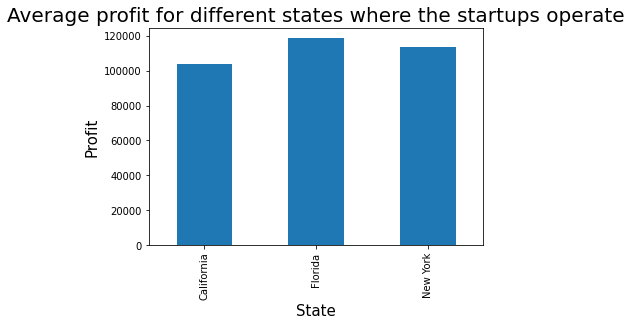

In [171]:
ax = dataset.groupby('State')['Profit'].mean().plot(kind = 'bar')

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [172]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [173]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [175]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)


In [176]:
# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [177]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [178]:
dependent_var = 'Profit'

In [179]:
# Create a list of independent variables
independent_vars = list(set(dataset.columns.tolist()) - {dependent_var})
independent_vars

['Florida_State',
 'R&D Spend',
 'Marketing Spend',
 'NewYork_State',
 'Administration',
 'California_State']

In [180]:
# Create the data of independent variables
X = dataset[independent_vars].values

# Create the dependent variable data
y = dataset[dependent_var].values

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [182]:
X_train[:10]

array([[1.0000000e+00, 5.5493950e+04, 2.1463481e+05, 0.0000000e+00,
        1.0305749e+05, 0.0000000e+00],
       [0.0000000e+00, 4.6014020e+04, 2.0551764e+05, 1.0000000e+00,
        8.5047440e+04, 0.0000000e+00],
       [1.0000000e+00, 7.5328870e+04, 1.3405007e+05, 0.0000000e+00,
        1.4413598e+05, 0.0000000e+00],
       [0.0000000e+00, 4.6426070e+04, 2.1079767e+05, 0.0000000e+00,
        1.5769392e+05, 1.0000000e+00],
       [1.0000000e+00, 9.1749160e+04, 2.9491957e+05, 0.0000000e+00,
        1.1417579e+05, 0.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 3.2387668e+05, 0.0000000e+00,
        1.4553006e+05, 0.0000000e+00],
       [1.0000000e+00, 1.1994324e+05, 2.5651292e+05, 0.0000000e+00,
        1.5654742e+05, 0.0000000e+00],
       [0.0000000e+00, 1.0002300e+03, 1.9039300e+03, 1.0000000e+00,
        1.2415304e+05, 0.0000000e+00],
       [0.0000000e+00, 5.4205000e+02, 0.0000000e+00, 1.0000000e+00,
        5.1743150e+04, 0.0000000e+00],
       [0.0000000e+00, 6.5605480e+04,

In [183]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [185]:
regressor.intercept_

44153.95466784858

In [186]:
regressor.coef_

array([-8.72645791e+02,  1.27892182e+05,  1.72720281e+04,  7.86007422e+02,
        3.49927567e+03,  8.66383692e+01])

In [187]:
# checking te order of coefficients (Beta1,Beta2,Beta3 ...)
dataset[independent_vars]

,Florida_State,R&D Spend,Marketing Spend,NewYork_State,Administration,California_State
0,0,165349.20,471784.10,1,136897.80,0
1,0,162597.70,443898.53,0,151377.59,1
2,1,153441.51,407934.54,0,101145.55,0
3,0,144372.41,383199.62,1,118671.85,0
4,1,142107.34,366168.42,0,91391.77,0
5,0,131876.90,362861.36,1,99814.71,0
6,0,134615.46,127716.82,0,147198.87,1
7,1,130298.13,323876.68,0,145530.06,0
8,0,120542.52,311613.29,1,148718.95,0
9,0,123334.88,304981.62,0,108679.17,1


In [188]:
regressor.predict(X_train)

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [189]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [190]:
y_pred = regressor.predict(X_test)

In [191]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [192]:
y_pred_train = regressor.predict(X_train)

In [193]:
# Train performance
math.sqrt(mean_squared_error(y_train,y_pred_train))

9031.66661257897

In [194]:
# Test performance
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794944

In [195]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [196]:
r2_score(y_test,y_pred)

0.9347068473282425